In [1]:
import sys
print(sys.version)

3.5.4 |Anaconda custom (64-bit)| (default, Aug 14 2017, 13:26:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import neighbors
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
pd.options.display.max_seq_items = 2000

# Functions

In [3]:
def get_X_and_Y(df):
    X = df.values[:, :-1]
    Y = df.values[:, -1:]
    return (X, Y)

In [4]:
def run_clf(clf, X_train, Y_train, X_test, Y_test):
    print()
    clf.fit(X_train, Y_train.reshape(-1, ))
    pred = clf.predict(X_test)
    #if(hasattr(clf, 'best_params_')):
        #results(clf, X_test, Y_test, "test")
    return accuracy_score(Y_test, pred)

In [5]:
def results(clf, x_test, y_test, dataset_name):
    print("Best parameters for training set of " + dataset_name + " dataset:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    
    plt.semilogx()
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
    print()
    print("Accuracy of Logistic Regression on " + dataset_name + " dataset")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(accuracy_score(y_true, y_pred))
    print()

In [6]:
def get_cv(clf, param_grid):
    return GridSearchCV(clf, param_grid, cv=2, scoring='accuracy', n_jobs=8)

In [7]:
def get_values(l, param_name):
    return [d[param_name] for d in l]

In [8]:
def get_KNN_values(score):
    hyperparams = score[2]
    params = hyperparams['params']
    param_range = get_values(params, list(params[0].keys())[0])
    train_scores = hyperparams['mean_train_score']
    test_scores = hyperparams['mean_test_score']
    return (param_range, train_scores, test_scores)

def setup_KNN_subplot(ix, split):
    plt.subplot(1, 3, ix + 1)
    plt.title('Validation Curve with KNN at split: ' + str(split))
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.ylim(0.0, 1.1)

def plot_KNN_split(ix, split):
    scores = results[results.index.str.contains("KNN_" + str(split))]
    colors = ['darkorange', 'navy', 'green']
    setup_KNN_subplot(ix, split)
    
    for name, score, color in zip(df_names, scores.values, colors):
        param_range, train_scores, test_scores = get_KNN_values(score)
        plt.plot(param_range, train_scores, label= name + " Training Score", color = color, linestyle = '--')
        plt.plot(param_range, test_scores, label= name + " Cross-validation Score", color = color)

def plot_KNN():
    plt.figure(figsize=(20,6))
    for ix, split in enumerate(splits):
        plot_KNN_split(ix, split)

    plt.legend(loc="best")
    plt.show()

In [9]:
def get_LR_values(score):
    hyperparams = score[2]
    params = hyperparams['params']
    param_range = get_values(params, list(params[0].keys())[0])
    train_scores = hyperparams['mean_train_score']
    test_scores = hyperparams['mean_test_score']
    return (param_range, train_scores, test_scores)

def setup_LR_subplot(ix, split):
    plt.subplot(1, 3, ix + 1)
    plt.title('Validation Curve with Logistic Regression at split: ' + str(split))
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.ylim(0.0, 1.1)

def plot_LR_split(ix, split):
    scores = results[results.index.str.contains("Logistic Regression_" + str(split))]
    colors = ['darkorange', 'navy', 'green']
    setup_LR_subplot(ix, split)
    
    for name, score, color in zip(df_names, scores.values, colors):
        param_range, train_scores, test_scores = get_LR_values(score)
        plt.semilogx(param_range, train_scores, label= name + " Training Score", color = color, linestyle = '--')
        plt.semilogx(param_range, test_scores, label= name + " Cross-validation Score", color = color)

def plot_LR():
    plt.figure(figsize=(20,6))
    for ix, split in enumerate(splits):
        plot_LR_split(ix, split)

    plt.legend(loc="best")
    plt.show()

In [10]:
def get_RF_values(score):
    hyperparams = score[2]
    params = hyperparams['params']
    param_range = get_values(params, list(params[0].keys())[0])
    train_scores = hyperparams['mean_train_score']
    test_scores = hyperparams['mean_test_score']
    return (param_range, train_scores, test_scores)

def setup_RF_subplot(ix, split):
    plt.subplot(1, 3, ix + 1)
    plt.title('Validation Curve with Random Forest at split: ' + str(split))
    plt.xlabel('Trees')
    plt.ylabel('Accuracy')
    plt.ylim(0.0, 1.1)

def plot_RF_split(ix, split):
    scores = results[results.index.str.contains("Random Forest_" + str(split))]
    colors = ['darkorange', 'navy', 'green']
    setup_RF_subplot(ix, split)
    
    for name, score, color in zip(df_names, scores.values, colors):
        param_range, train_scores, test_scores = get_RF_values(score)
        plt.plot(param_range, train_scores, label= name + " Training Score", color = color, linestyle = '--')
        plt.plot(param_range, test_scores, label= name + " Cross-validation Score", color = color)

def plot_RF():
    plt.figure(figsize=(20,6))
    for ix, split in enumerate(splits):
        plot_RF_split(ix, split)

    plt.legend(loc="best")
    plt.show()

# Get the Data!

Import data from UCI Repository 

In [11]:
files = ['adult.data', 'letter-recognition.data', 'covtype.data'] 
df_adult, df_letter, df_covtype = [pd.read_csv(file, header=None) for file in files]

# Preprocess the Data!

## Inspect the ADULT dataset

In [12]:
# Based on the Data Description in 
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

df_adult.columns = ['age'
                    , 'workclass'
                    , 'fnlwgt'
                    , 'education'
                    , 'education-num'
                    , 'marital-status'
                    , 'occupation'
                    , 'relationship'
                    , 'race'
                    , 'sex'
                    , 'capital-gain'
                    , 'captial-loss'
                    , 'hours-per-week'
                    , 'native-country'
                    , 'income']

In [13]:
df_adult.isnull().values.any()

False

In [14]:
print('Number of rows in ADULT:' + str(len(df_adult)))

df_adult.head()

Number of rows in ADULT:32561


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Vectorize categorical columns in ADULT dataset

In [15]:
df_adult = pd.get_dummies(df_adult)

In [16]:
df_adult = df_adult.drop(['sex_ Female', 'income_ <=50K'], axis=1)

In [17]:
df_adult.head()

,age,fnlwgt,education-num,capital-gain,captial-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Convert to numpy arrays and split

In [18]:
df_adult = df_adult.sample(frac=1)
adult_X, adult_Y = get_X_and_Y(df_adult)

adult_X_train, adult_X_test, adult_Y_train, adult_Y_test = \
 train_test_split(adult_X, adult_Y, test_size=0.33)

In [19]:
# Don't split. rerun classifiers, randomizing train/test split each time. 

print('adult_X_train.shape: ' + str(adult_X_train.shape))
print('adult_Y_train.shape: ' + str(adult_Y_train.shape))
print('adult_X_test.shape : ' + str(adult_X_test.shape))
print('adult_Y_test.shape : ' + str(adult_Y_test.shape))


adult_X_train.shape: (21815, 107)
adult_Y_train.shape: (21815, 1)
adult_X_test.shape : (10746, 107)
adult_Y_test.shape : (10746, 1)


## Inspect the LETTER dataset

In [20]:
print('Number of rows in LETTER: ' + str(len(df_letter)))

df_letter.head()

Number of rows in LETTER: 20000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [21]:
# Based on the Data Description in 
# https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.names

df_letter.columns = [   'lettr'
                        , 'x-box'
                        , 'y-box'
                        , 'width'
                        , 'high '
                        , 'onpix'
                        , 'x-bar'
                        , 'y-bar'
                        , 'x2bar'
                        , 'y2bar'
                        , 'xybar'
                        , 'x2ybr'
                        , 'xy2br'
                        , 'x-ege'
                        , 'xegvy'
                        , 'y-ege'
                        , 'yegvx']

In [22]:
# In Caruana & Niculescu-Mizil,. 2006, 
# the LETTER.p1 dataset was analyzed with the letter 'O' being the positive case 
# and all else negative. 

df_letter['lettr'] = df_letter['lettr'].map({'O':1}).fillna(0)

In [23]:
df_letter.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,0.0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,0.0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,0.0,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,0.0,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,0.0,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [24]:
# Make the 'lettr' column last to conform with other datasets. 
cols = df_letter.columns.tolist()
cols = cols[1:-2] + cols[:1]

In [25]:
df_letter = df_letter[cols]

### Convert to numpy array and split

In [26]:
letter_X, letter_Y = get_X_and_Y(df_letter)

letter_X_train, letter_X_test, letter_Y_train, letter_Y_test = \
 train_test_split(letter_X, letter_Y, test_size=0.33)

In [27]:
print('letter_X_train.shape: ' + str(letter_X_train.shape))
print('letter_Y_train.shape: ' + str(letter_Y_train.shape))
print('letter_X_test.shape : ' + str(letter_X_test.shape))
print('letter_Y_test.shape : ' + str(letter_Y_test.shape))

letter_X_train.shape: (13400, 14)
letter_Y_train.shape: (13400, 1)
letter_X_test.shape : (6600, 14)
letter_Y_test.shape : (6600, 1)


## Inspect the COV_TYPE dataset

In [28]:
df_covtype.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [29]:
# Not going to rename columns here, there's way too many.
# According to https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info
# column 54 is the cover type, which is what we're classifying. 

In [30]:
# In Caruana & Niculescu-Mizil,. 2006, the COV_TYPE dataset 
# was classified with the largest covertype as the positive case, 
# all else negative

df_covtype[54] = df_covtype[54].map({7:1}).fillna(0)

In [31]:
df_covtype = df_covtype.head(20000)

## Combine Datasets

In [32]:
dfs = [df_adult, df_letter, df_covtype]

# Classifiers!

## Logistic Regression

In [33]:
#param_grid = {'C': [10e-8, 10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 1, 10e1, 10e2, 10e3, 10e4]}
param_grid = {'C': [10e-8, 10e-4, 1, 10e1]}
lr = get_cv(LogisticRegression(), param_grid)

## K Neartest Neighbors (KNN)

In [34]:
# In Caruana & Niculescu-Mizil,. 2006, there are 26 values of K
# ranging from 1 to |trainset|. Because 3200 is the smallest possible trainset
# we can achieve, we'll use that |trainset|. 

#param_grid = {'n_neighbors': list(range(1, 3200, round(3200/26)))}
param_grid = {'n_neighbors': list(range(1, 10))}
knn = get_cv(neighbors.KNeighborsClassifier(), param_grid)

## Random Forest (RF)

In [35]:
param_grid = {'n_estimators': list(range(100,600,100))}
rf = get_cv(RandomForestClassifier(), param_grid)

## Combine Classifiers

In [36]:
clfs = [lr, knn, rf]

# Do the thing! 

## Constants

In [37]:
n_trials = 1
clf_names = ["Logistic Regression", "KNN", "Random Forest"]
df_names = ["ADULT", "LETTER", "COV_TYPE"]
splits = [.2, .5, .8]

df_space = tuple(zip(df_names, dfs))
clfs_space = tuple(zip(clf_names, clfs))

search_space_elements = [df_space, clfs_space, splits]

In [38]:
results = pd.DataFrame(columns = ['train_score', 'test_score', 'hyper-params'])
for df, clf, split in itertools.product(*search_space_elements):
    training_scores = []
    testing_scores = []
    key = df[0] + '_' + clf[0] + '_' + str(split)
    print(key)
    for i in range(n_trials): 
        data = df[1].sample(frac=1) # Shuffle the data.
        X, Y = get_X_and_Y(data)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split)
        clf[1].fit(X_train, Y_train.reshape(-1, ))
        train_score = max(clf[1].cv_results_['mean_train_score'])
        test_score = max(clf[1].cv_results_['mean_test_score'])
        training_scores.append(train_score)
        testing_scores.append(test_score)
    results.loc[key] = [np.array(training_scores).mean(), np.array(testing_scores).mean(), clf[1].cv_results_]
    print(results)


ADULT_Logistic Regression_0.2
                               train_score  test_score  \
ADULT_Logistic Regression_0.2     0.797796    0.797758   

                                                                    hyper-params  
ADULT_Logistic Regression_0.2  {'mean_train_score': [0.796337530713, 0.797796...  
ADULT_Logistic Regression_0.5
                               train_score  test_score  \
ADULT_Logistic Regression_0.2     0.797796    0.797758   
ADULT_Logistic Regression_0.5     0.795577    0.795393   

                                                                    hyper-params  
ADULT_Logistic Regression_0.2  {'mean_train_score': [0.796337530713, 0.797796...  
ADULT_Logistic Regression_0.5  {'mean_train_score': [0.794287469287, 0.795577...  
ADULT_Logistic Regression_0.8
                               train_score  test_score  \
ADULT_Logistic Regression_0.2     0.797796    0.797758   
ADULT_Logistic Regression_0.5     0.795577    0.795393   
ADULT_Logistic Regression_0.8

                                train_score  test_score  \
ADULT_Logistic Regression_0.2      0.797796    0.797758   
ADULT_Logistic Regression_0.5      0.795577    0.795393   
ADULT_Logistic Regression_0.8      0.804821    0.803747   
ADULT_KNN_0.2                      0.999962    0.791884   
ADULT_KNN_0.5                      1.000000    0.790786   
ADULT_KNN_0.8                      1.000000    0.787930   
ADULT_Random Forest_0.2            1.000000    0.854538   
ADULT_Random Forest_0.5            1.000000    0.853747   
ADULT_Random Forest_0.8            1.000000    0.849048   
LETTER_Logistic Regression_0.2     0.961938    0.961938   
LETTER_Logistic Regression_0.5     0.960100    0.960100   

                                                                     hyper-params  
ADULT_Logistic Regression_0.2   {'mean_train_score': [0.796337530713, 0.797796...  
ADULT_Logistic Regression_0.5   {'mean_train_score': [0.794287469287, 0.795577...  
ADULT_Logistic Regression_0.8   {'mean_

                                train_score  test_score  \
ADULT_Logistic Regression_0.2      0.797796    0.797758   
ADULT_Logistic Regression_0.5      0.795577    0.795393   
ADULT_Logistic Regression_0.8      0.804821    0.803747   
ADULT_KNN_0.2                      0.999962    0.791884   
ADULT_KNN_0.5                      1.000000    0.790786   
ADULT_KNN_0.8                      1.000000    0.787930   
ADULT_Random Forest_0.2            1.000000    0.854538   
ADULT_Random Forest_0.5            1.000000    0.853747   
ADULT_Random Forest_0.8            1.000000    0.849048   
LETTER_Logistic Regression_0.2     0.961938    0.961938   
LETTER_Logistic Regression_0.5     0.960100    0.960100   
LETTER_Logistic Regression_0.8     0.966500    0.966500   
LETTER_KNN_0.2                     1.000000    0.987437   
LETTER_KNN_0.5                     1.000000    0.983800   
LETTER_KNN_0.8                     1.000000    0.979250   
LETTER_Random Forest_0.2           1.000000    0.988938 

                                  train_score  test_score  \
ADULT_Logistic Regression_0.2        0.797796    0.797758   
ADULT_Logistic Regression_0.5        0.795577    0.795393   
ADULT_Logistic Regression_0.8        0.804821    0.803747   
ADULT_KNN_0.2                        0.999962    0.791884   
ADULT_KNN_0.5                        1.000000    0.790786   
ADULT_KNN_0.8                        1.000000    0.787930   
ADULT_Random Forest_0.2              1.000000    0.854538   
ADULT_Random Forest_0.5              1.000000    0.853747   
ADULT_Random Forest_0.8              1.000000    0.849048   
LETTER_Logistic Regression_0.2       0.961938    0.961938   
LETTER_Logistic Regression_0.5       0.960100    0.960100   
LETTER_Logistic Regression_0.8       0.966500    0.966500   
LETTER_KNN_0.2                       1.000000    0.987437   
LETTER_KNN_0.5                       1.000000    0.983800   
LETTER_KNN_0.8                       1.000000    0.979250   
LETTER_Random Forest_0.2

                                  train_score  test_score  \
ADULT_Logistic Regression_0.2        0.797796    0.797758   
ADULT_Logistic Regression_0.5        0.795577    0.795393   
ADULT_Logistic Regression_0.8        0.804821    0.803747   
ADULT_KNN_0.2                        0.999962    0.791884   
ADULT_KNN_0.5                        1.000000    0.790786   
ADULT_KNN_0.8                        1.000000    0.787930   
ADULT_Random Forest_0.2              1.000000    0.854538   
ADULT_Random Forest_0.5              1.000000    0.853747   
ADULT_Random Forest_0.8              1.000000    0.849048   
LETTER_Logistic Regression_0.2       0.961938    0.961938   
LETTER_Logistic Regression_0.5       0.960100    0.960100   
LETTER_Logistic Regression_0.8       0.966500    0.966500   
LETTER_KNN_0.2                       1.000000    0.987437   
LETTER_KNN_0.5                       1.000000    0.983800   
LETTER_KNN_0.8                       1.000000    0.979250   
LETTER_Random Forest_0.2

                                  train_score  test_score  \
ADULT_Logistic Regression_0.2        0.797796    0.797758   
ADULT_Logistic Regression_0.5        0.795577    0.795393   
ADULT_Logistic Regression_0.8        0.804821    0.803747   
ADULT_KNN_0.2                        0.999962    0.791884   
ADULT_KNN_0.5                        1.000000    0.790786   
ADULT_KNN_0.8                        1.000000    0.787930   
ADULT_Random Forest_0.2              1.000000    0.854538   
ADULT_Random Forest_0.5              1.000000    0.853747   
ADULT_Random Forest_0.8              1.000000    0.849048   
LETTER_Logistic Regression_0.2       0.961938    0.961938   
LETTER_Logistic Regression_0.5       0.960100    0.960100   
LETTER_Logistic Regression_0.8       0.966500    0.966500   
LETTER_KNN_0.2                       1.000000    0.987437   
LETTER_KNN_0.5                       1.000000    0.983800   
LETTER_KNN_0.8                       1.000000    0.979250   
LETTER_Random Forest_0.2

# Graph the Results!

In [39]:
results[results.index.str.contains('ADULT_Logistic Regression')]['train_score'].values

array([ 0.79779638,  0.7955774 ,  0.80482086])

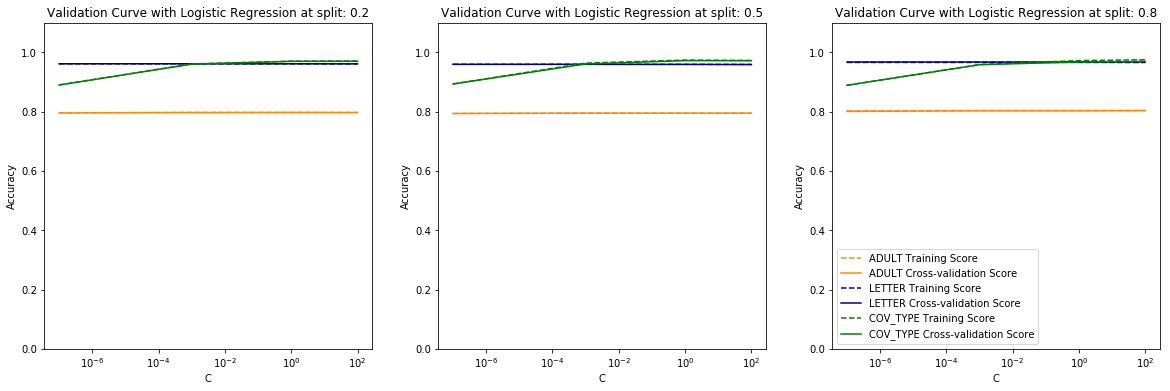

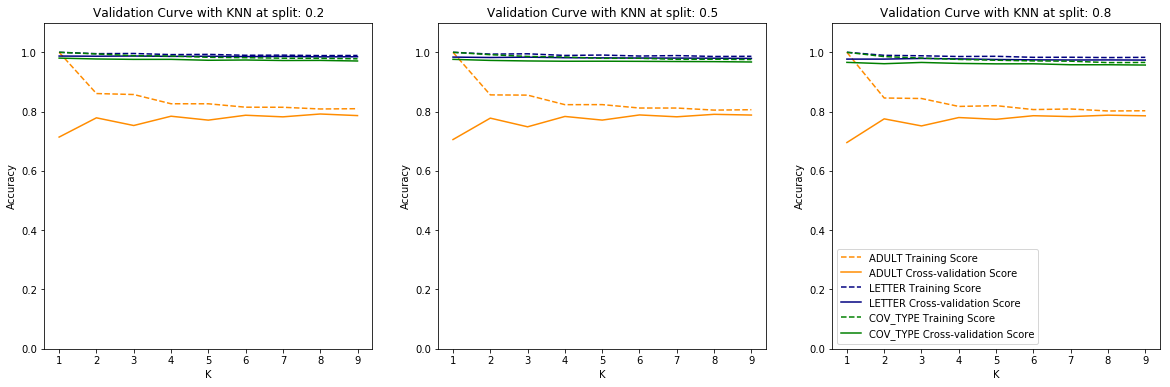

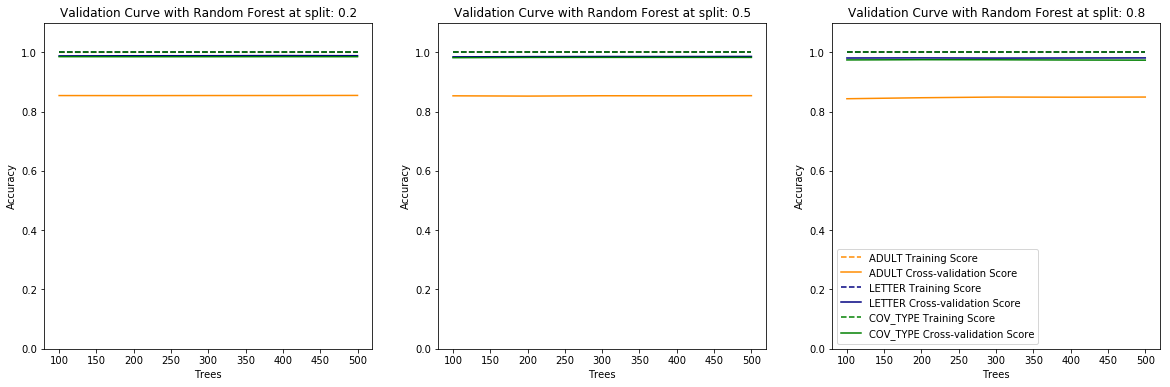

In [40]:
plot_LR()
plot_KNN()
plot_RF()

In [52]:
r_train1

array([ 1.,  1.,  1.])

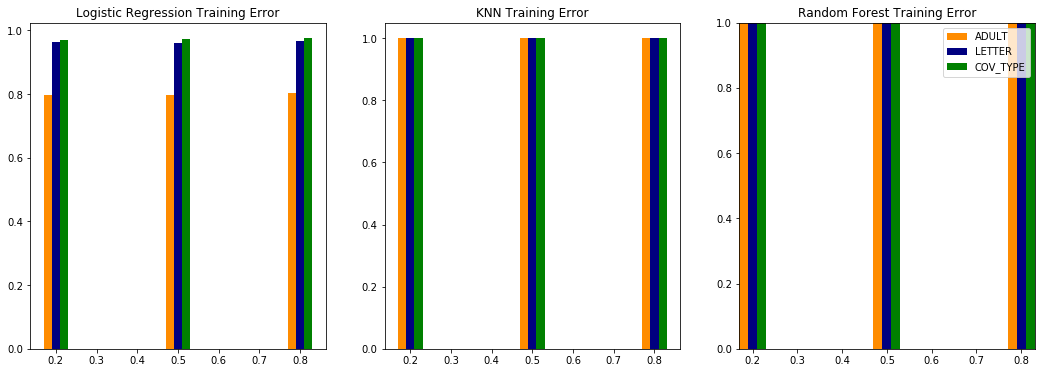

In [54]:
a_train1 = results[results.index.str.contains('ADULT_Logistic Regression')]['train_score'].values
a_train2 = results[results.index.str.contains('LETTER_Logistic Regression')]['train_score'].values
a_train3 = results[results.index.str.contains('COV_TYPE_Logistic Regression')]['train_score'].values

k_train1 = results[results.index.str.contains('ADULT_KNN')]['train_score'].values
k_train2 = results[results.index.str.contains('LETTER_KNN')]['train_score'].values
k_train3 = results[results.index.str.contains('COV_TYPE_KNN')]['train_score'].values

r_train1 = results[results.index.str.contains('ADULT_Random Forest')]['train_score'].values
r_train2 = results[results.index.str.contains('LETTER_Random Forest')]['train_score'].values
r_train3 = results[results.index.str.contains('COV_TYPE_Random Forest')]['train_score'].values

fig = plt.figure(figsize=(18,6))
LR_ax = fig.add_subplot(1, 3, 1)
LR_ax.bar(np.array(splits)-0.02, a_train1, width=0.02, color='darkorange', label='ADULT')
LR_ax.bar(np.array(splits), a_train2, width=0.02, color='navy', label='LETTER')
LR_ax.bar(np.array(splits)+0.02, a_train3, width=0.02, color='green', label='COV_TYPE')
LR_ax.set_title("Logistic Regression Training Accuracy")

KNN_ax = fig.add_subplot(1, 3, 2)
KNN_ax.bar(np.array(splits)-0.02, k_train1, width=0.02, color='darkorange', label='ADULT')
KNN_ax.bar(np.array(splits), k_train2, width=0.02, color='navy', label='LETTER')
KNN_ax.bar(np.array(splits)+0.02, k_train3, width=0.02, color='green', label='COV_TYPE')
KNN_ax.set_title("KNN Training Accuracy")

RF_ax = fig.add_subplot(1, 3, 3)
RF_ax.bar(np.array(splits)-0.02, r_train1, width=0.02, color='darkorange', label='ADULT')
RF_ax.bar(np.array(splits), r_train2, width=0.02, color='navy', label='LETTER')
RF_ax.bar(np.array(splits)+0.02, r_train3, width=0.02, color='green', label='COV_TYPE')
RF_ax.set_title("Random Forest Training Accuracy")


plt.legend(loc="best")
plt.autoscale(tight=True)
plt.show()

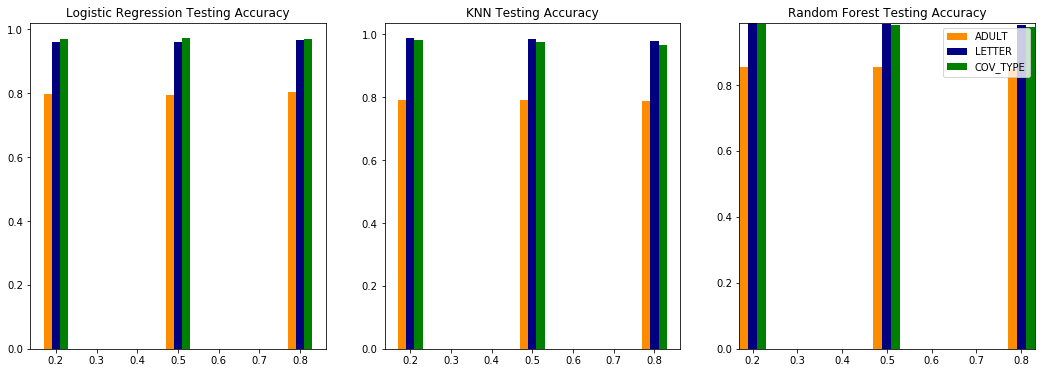

In [55]:
a_test1 = results[results.index.str.contains('ADULT_Logistic Regression')]['test_score'].values
a_test2 = results[results.index.str.contains('LETTER_Logistic Regression')]['test_score'].values
a_test3 = results[results.index.str.contains('COV_TYPE_Logistic Regression')]['test_score'].values

k_test1 = results[results.index.str.contains('ADULT_KNN')]['test_score'].values
k_test2 = results[results.index.str.contains('LETTER_KNN')]['test_score'].values
k_test3 = results[results.index.str.contains('COV_TYPE_KNN')]['test_score'].values

r_test1 = results[results.index.str.contains('ADULT_Random Forest')]['test_score'].values
r_test2 = results[results.index.str.contains('LETTER_Random Forest')]['test_score'].values
r_test3 = results[results.index.str.contains('COV_TYPE_Random Forest')]['test_score'].values

fig = plt.figure(figsize=(18,6))
LR_ax = fig.add_subplot(1, 3, 1)
LR_ax.bar(np.array(splits)-0.02, a_test1, width=0.02, color='darkorange', label='ADULT')
LR_ax.bar(np.array(splits), a_test2, width=0.02, color='navy', label='LETTER')
LR_ax.bar(np.array(splits)+0.02, a_test3, width=0.02, color='green', label='COV_TYPE')
LR_ax.set_title("Logistic Regression Testing Accuracy")

KNN_ax = fig.add_subplot(1, 3, 2)
KNN_ax.bar(np.array(splits)-0.02, k_test1, width=0.02, color='darkorange', label='ADULT')
KNN_ax.bar(np.array(splits), k_test2, width=0.02, color='navy', label='LETTER')
KNN_ax.bar(np.array(splits)+0.02, k_test3, width=0.02, color='green', label='COV_TYPE')
KNN_ax.set_title("KNN Testing Accuracy")

RF_ax = fig.add_subplot(1, 3, 3)
RF_ax.bar(np.array(splits)-0.02, r_test1, width=0.02, color='darkorange', label='ADULT')
RF_ax.bar(np.array(splits), r_test2, width=0.02, color='navy', label='LETTER')
RF_ax.bar(np.array(splits)+0.02, r_test3, width=0.02, color='green', label='COV_TYPE')
RF_ax.set_title("Random Forest Testing Accuracy")


plt.legend(loc="best")
plt.autoscale(tight=True)
plt.show()

In [ ]:
len(df_covtype[df_covtype[54] == 1])

## Logistic Regression

In [ ]:
param_grid = {'C': [10e-8, 10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 1, 10e1, 10e2, 10e3, 10e4]}
#param_grid = {'C': [10e-8, 10e4]}
clf = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
clf


## ADULT Dataset

In [ ]:
run_clf(clf, adult_X_train, adult_Y_train, adult_X_test, adult_Y_test)

In [ ]:
clf.cv_results_
#[d['value'] for d in l]
p = clf.cv_results_['params']
print([list(d.values())[0] for d in p])
plt.semilogx([list(d.values())[0] for d in p], clf.cv_results_['mean_train_score'], 'g', label='train')
plt.semilogx([list(d.values())[0] for d in p], clf.cv_results_['mean_test_score'], 'r', label='test')
plt.legend(loc = 'upper right')
plt.show()

### LETTER Dataset

In [ ]:
run_clf(clf, letter_X_train, letter_Y_train, letter_X_test, letter_Y_test)

### COV_TYPE Dataset

In [ ]:
run_clf(clf, covtype_X_train, covtype_Y_train, covtype_X_test, covtype_Y_test)

In [ ]:
#clf.fit(covtype_X_train, covtype_Y_train.reshape(-1, ))

In [ ]:
#results(clf, covtype_X_test, covtype_Y_test, "COV_TYPE")

## KNN

In [ ]:
k = np.arange(5) + 1
parameters = {'n_neighbors': k}
knn = neighbors.KNeighborsClassifier()
knn = GridSearchCV(knn,parameters,cv=5)
#clf = neighbors.KNeighborsClassifier(3)

### Adult

In [ ]:
run_clf(knn, adult_X_train, adult_Y_train, adult_X_test, adult_Y_test)

In [ ]:
knn.cv_results_['mean_train_score']

In [ ]:
knn.cv_results_
#[d['value'] for d in l]
p = knn.cv_results_['params']
print([list(d.values())[0] for d in p])
plt.plot([list(d.values())[0] for d in p], knn.cv_results_['mean_train_score'], 'g', label='train')
plt.plot([list(d.values())[0] for d in p], knn.cv_results_['mean_test_score'], 'r', label='test')
plt.legend(loc = 'upper right')
plt.show()

### LETTER

In [ ]:
run_clf(clf, letter_X_train, letter_Y_train, letter_X_test, letter_Y_test)

### COV_TYPE

In [ ]:
run_clf(clf, covtype_X_train, covtype_Y_train, covtype_X_test, covtype_Y_test)

## Random Forest

In [ ]:
clf = RandomForestClassifier()

### ADULT

In [ ]:
run_RF(clf, adult_X_train, adult_Y_train, adult_X_test, adult_Y_test)

### LETTER

In [ ]:
run_RF(clf, letter_X_train, letter_Y_train, letter_X_test, letter_Y_test)

### COV_TYPE

In [ ]:
run_RF(clf, covtype_X_train, covtype_Y_train, covtype_X_test, covtype_Y_test)